In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


In [ ]:
BankData=pd.read_excel("BankData.xlsx")
BankData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
BankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
BankData.describe() #returns description of the data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
BankData.shape

(45211, 17)

In [ ]:
BankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
BankData.isnull().sum() # NO NULL VALUES PRESENT IN THE DATA

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
BankData.shape  #SHAPE OF THE DATA

(45211, 17)

In [ ]:
BankData.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02
day,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05
duration,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00
campaign,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03
pdays,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45
previous,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00


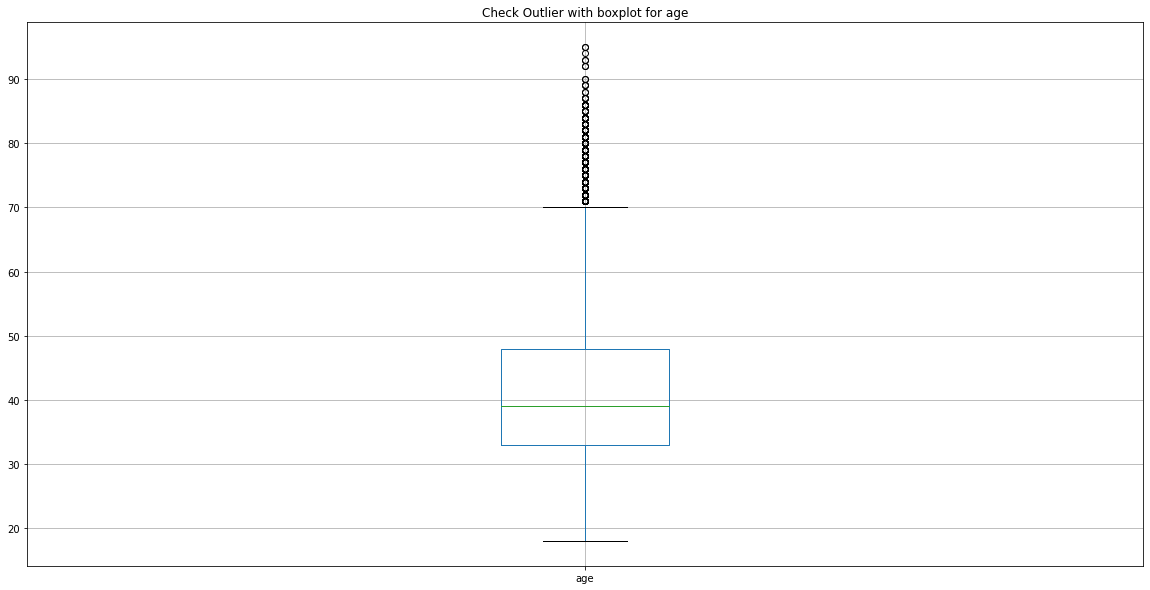

In [ ]:
#CHECKING FOR THE ANY OUTLIER PRESENT IN THE AGE 

plt.figure(figsize=(20,10))
plt.title("Check Outlier with boxplot for age")
BankData.boxplot(column=['age']);

<Figure size 1440x720 with 0 Axes>

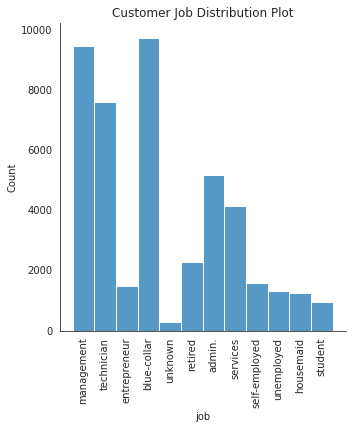

In [ ]:
plt.figure(figsize=[20,10])
chart=sns.displot(BankData['job'])
plt.title('Customer Job Distribution Plot')
chart.set_xticklabels(rotation=90)

Text(0.5, 1.0, 'Loan Pie Chart')

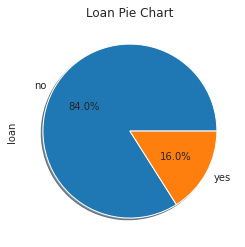

In [ ]:
#Display the percent value of Loan Taken Yes or No only by the Customer

BankData['loan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True) 
plt.title("Loan Pie Chart")

<Axes: ylabel='age'>

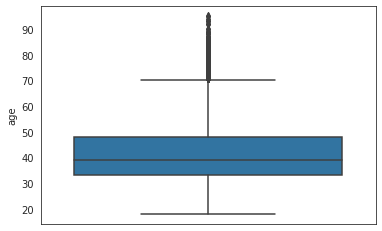

In [ ]:
import seaborn as sns
sns.boxplot(y='age',data=BankData)

<Axes: title={'center': 'Education of the Customer'}, xlabel='education', ylabel='count'>

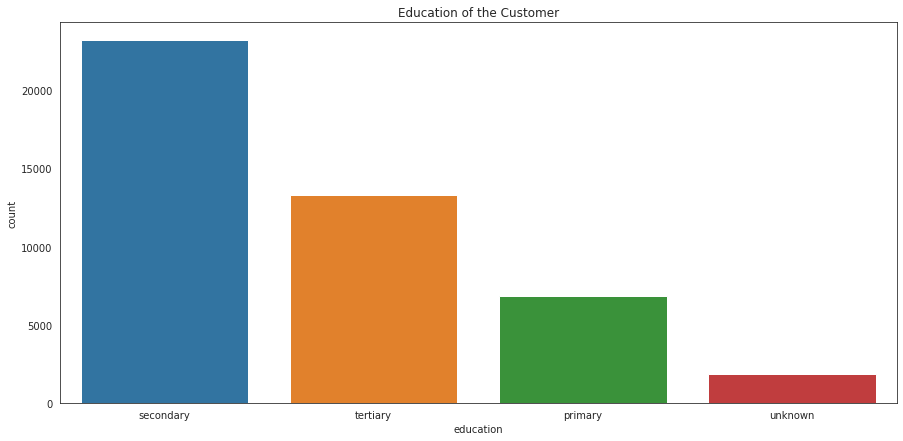

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Education of the Customer")
order = BankData['education'].value_counts(ascending=False).index 
sns.countplot(x='education', data=BankData, order=order)

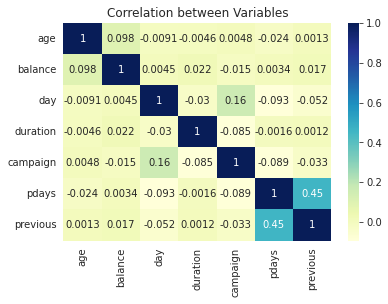

In [ ]:
sns.heatmap(BankData.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between Variables")
plt.show()

<ipython-input-18-657df13a6f72>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


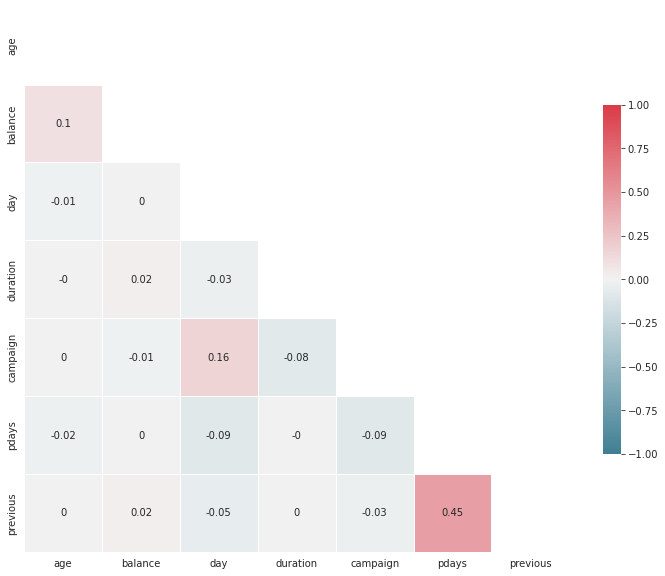

In [ ]:
sns.set_style("white")
# Generate and visualize the correlation matrix
corr = BankData.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

<Axes: title={'center': 'JobType of Subscribed Customers'}, xlabel='job', ylabel='count'>

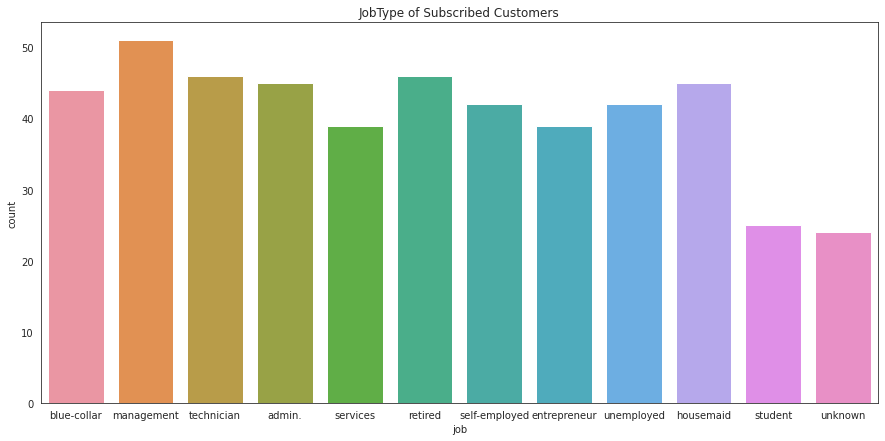

In [ ]:
response_df = BankData[['age', 'job', 'y']]
grouped_df = response_df.groupby(['age', 'job', 'y']).size().reset_index(name='count')
yes_responses_df = grouped_df[grouped_df['y'] == 'yes']
sorted_df = yes_responses_df.sort_values(['job', 'count'], ascending=[True, False])


plt.figure(figsize=(15,7))
plt.title("JobType of Subscribed Customers")
order = BankData['job'].value_counts(ascending=False).index 
sns.countplot(x='job', data=sorted_df, order=order)